In [191]:
import igraph as ig
import networkx as nx

import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from collections import Counter

from sklearn.datasets import load_wine

import matplotlib.pyplot as plt

# IGraph

In [250]:
G = ig.Graph()
G.add_vertices(['A','B','C','D','E'])
G.add_edges([('A','B'), ('A','C'), ('B','D'), ('C','D'), ('D','E'), ('D','A'), ('B','C')])
G.vs['label'] = ['A','B','C','D','E']

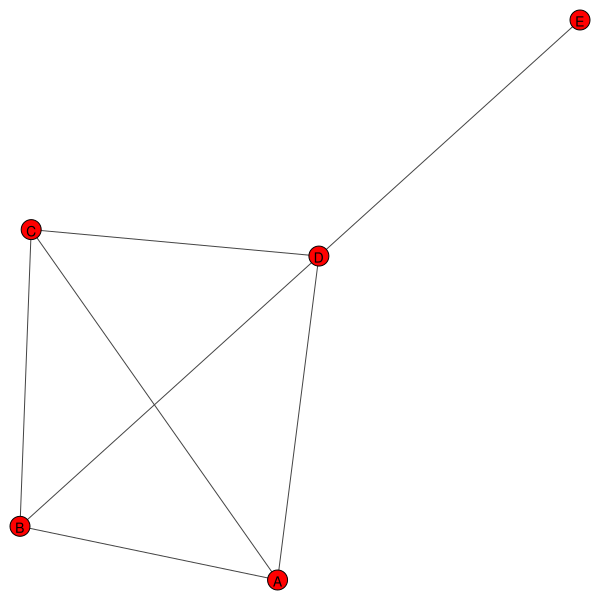

In [251]:
ig.plot(G)

In [252]:
G.maximal_cliques()

[(4, 3), (0, 1, 3, 2)]

In [254]:
list(zip(G.vs['label'],G.degree()))

[('A', 3), ('B', 3), ('C', 3), ('D', 4), ('E', 1)]

In [255]:
G.bridges()

[4]

# NetworkX

In [256]:
G = nx.Graph()
G.add_nodes_from(['A','B','C','D','E'])
G.add_edges_from([('A','B'), ('A','C'), ('B','D'), ('C','D'), ('D','E'), ('D','A')])

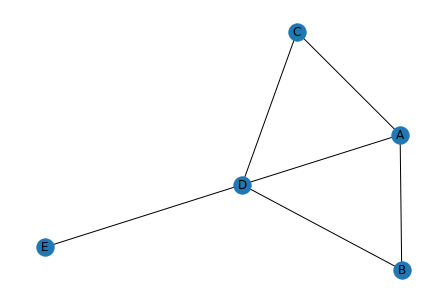

In [257]:
nx.draw(G,with_labels=True)

In [258]:
G.degree()

DegreeView({'A': 3, 'B': 2, 'C': 2, 'D': 4, 'E': 1})

## Harry Potter Network

[Source: Efe Karakuş](https://github.com/efekarakus/potter-network/tree/master/data)

In [259]:
HP_vertices = pd.read_csv('data/harry_potter_characters.csv')
HP_vertices

id                    name  \
0    0  Regulus Arcturus Black   
1    1            Sirius Black   
2    2          Lavender Brown   
3    3               Cho Chang   
4    4      Vincent Crabbe Sr.   
..  ..                     ...   
60  60                  Fluffy   
61  61                  Hedwig   
62  62          Moaning Myrtle   
63  63                  Aragog   
64  64                   Grawp   

                                                  bio  
0   Brother of Sirius. Used to be a Death Eater bu...  
1   Best friend of James Potter and godfather of H...  
2   Killed by a werewolf. She was a gryffindor stu...  
3   Ravenclaw student who dated Cedric Diggory and...  
4   Father of Crabbe and death-eater who escaped A...  
..                                                ...  
60       Three-headed dog belonging to Rubeus Hagrid.  
61                                       Harry's owl.  
62                                 Ghost at Hogwards.  
63            Acromantula belonging to Rubeus Hagrid.  
64                      Giant-half brother of Hagrid.  

[65 rows x 3 columns]

In [260]:
HP_edges = pd.read_csv('data/harry_potter_relations.csv')
HP_edges[['target','source']]

target  source
0         1       0
1        25       0
2        45       0
3         0       1
4        11       1
..      ...     ...
508      58      63
509      21      64
510      22      64
511      39      64
512      58      63

[513 rows x 2 columns]

In [261]:
PotterGraph = nx.Graph()

In [262]:
PotterGraph.add_nodes_from(HP_vertices)
PotterGraph.add_edges_from(np.array(HP_edges[['target','source']]))

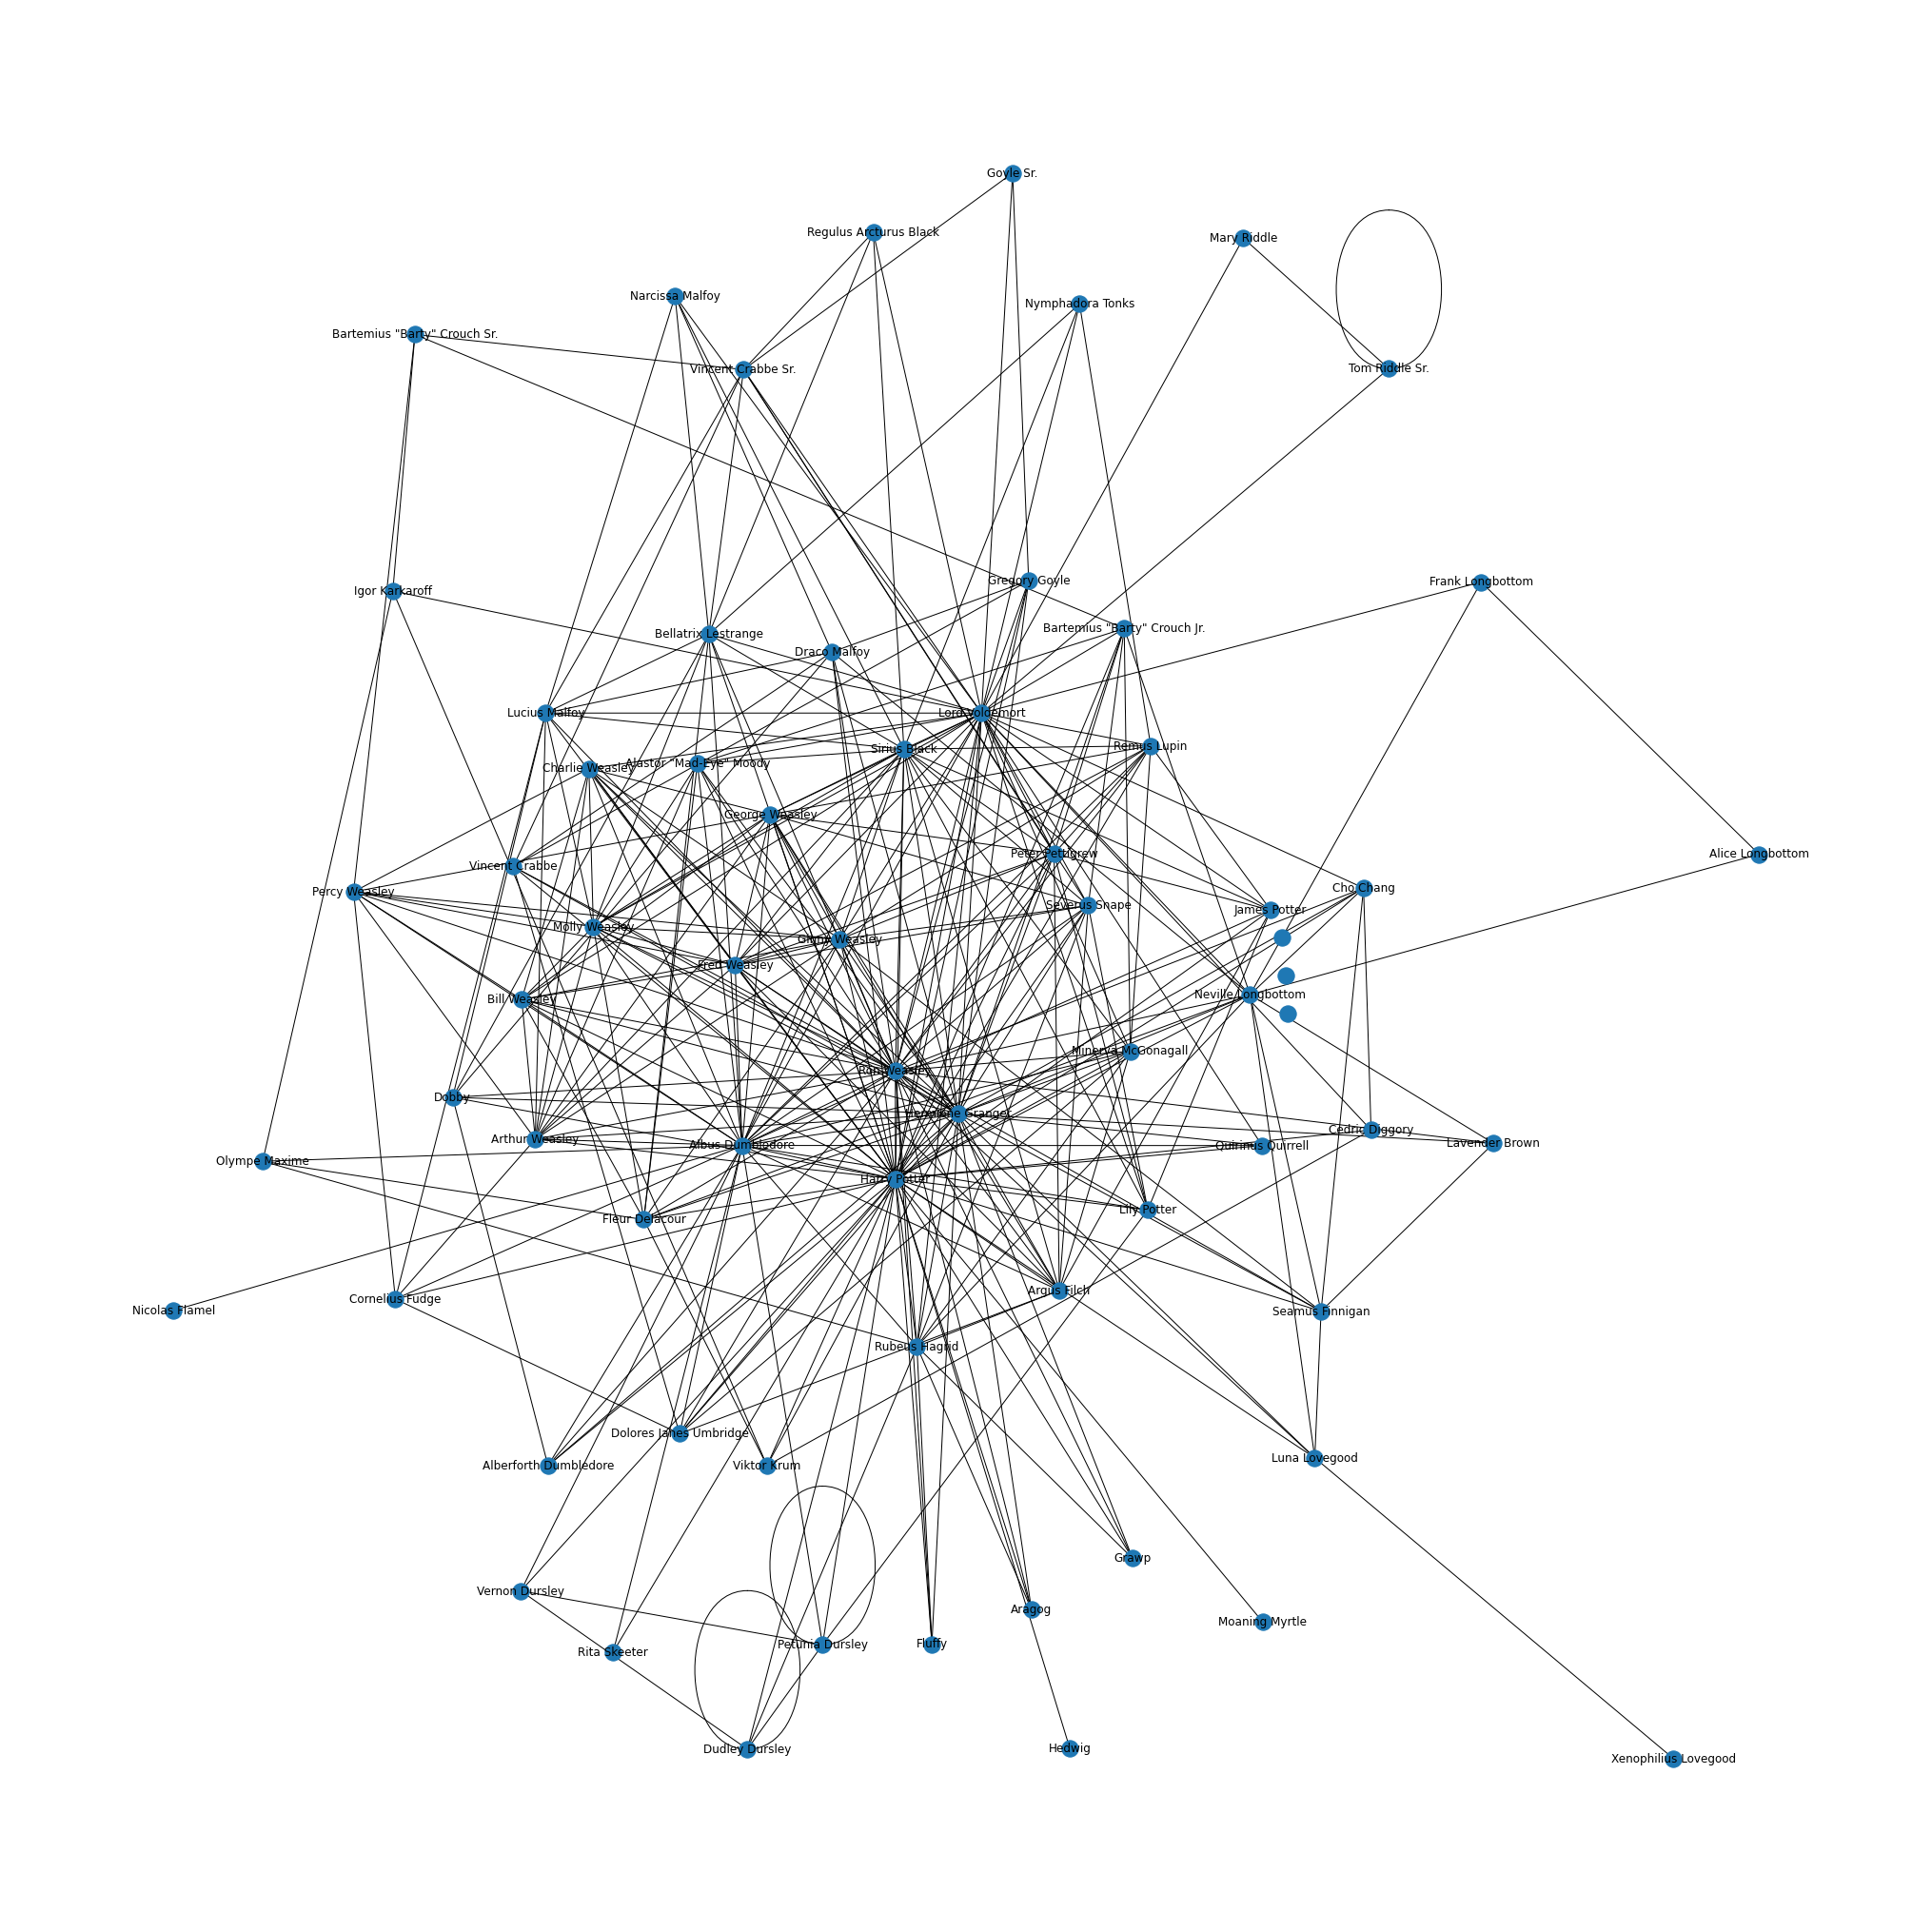

In [267]:
plt.figure(figsize=(28,28))
nx.draw_kamada_kawai(PotterGraph, with_labels=True, labels=HP_vertices['name'])

## Correlation Graphs



In [269]:
wine = load_wine()
data = pd.DataFrame(wine['data'])
data

0     1     2     3      4     5     6     7     8      9     10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  
0    3.92  1065.0  
1    3.40  1050.0  
2    3.17  1185.0  
3    3.45  1480.0  
4    2.93   735.0  
..    ...     ...  
173  1.74   740.0  
174  1.56   750.0  
175  1.56   835.0  
176  1.62   840.0  
177  1.60   560.0  

[178 rows x 13 columns]

In [270]:
corr = data.corr()
corr

0         1         2         3         4         5         6   \
0   1.000000  0.094397  0.211545 -0.310235  0.270798  0.289101  0.236815   
1   0.094397  1.000000  0.164045  0.288500 -0.054575 -0.335167 -0.411007   
2   0.211545  0.164045  1.000000  0.443367  0.286587  0.128980  0.115077   
3  -0.310235  0.288500  0.443367  1.000000 -0.083333 -0.321113 -0.351370   
4   0.270798 -0.054575  0.286587 -0.083333  1.000000  0.214401  0.195784   
5   0.289101 -0.335167  0.128980 -0.321113  0.214401  1.000000  0.864564   
6   0.236815 -0.411007  0.115077 -0.351370  0.195784  0.864564  1.000000   
7  -0.155929  0.292977  0.186230  0.361922 -0.256294 -0.449935 -0.537900   
8   0.136698 -0.220746  0.009652 -0.197327  0.236441  0.612413  0.652692   
9   0.546364  0.248985  0.258887  0.018732  0.199950 -0.055136 -0.172379   
10 -0.071747 -0.561296 -0.074667 -0.273955  0.055398  0.433681  0.543479   
11  0.072343 -0.368710  0.003911 -0.276769  0.066004  0.699949  0.787194   
12  0.643720 -0.192011  0.223626 -0.440597  0.393351  0.498115  0.494193   

          7         8         9         10        11        12  
0  -0.155929  0.136698  0.546364 -0.071747  0.072343  0.643720  
1   0.292977 -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
2   0.186230  0.009652  0.258887 -0.074667  0.003911  0.223626  
3   0.361922 -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
4  -0.256294  0.236441  0.199950  0.055398  0.066004  0.393351  
5  -0.449935  0.612413 -0.055136  0.433681  0.699949  0.498115  
6  -0.537900  0.652692 -0.172379  0.543479  0.787194  0.494193  
7   1.000000 -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
8  -0.365845  1.000000 -0.025250  0.295544  0.519067  0.330417  
9   0.139057 -0.025250  1.000000 -0.521813 -0.428815  0.316100  
10 -0.262640  0.295544 -0.521813  1.000000  0.565468  0.236183  
11 -0.503270  0.519067 -0.428815  0.565468  1.000000  0.312761  
12 -0.311385  0.330417  0.316100  0.236183  0.312761  1.000000

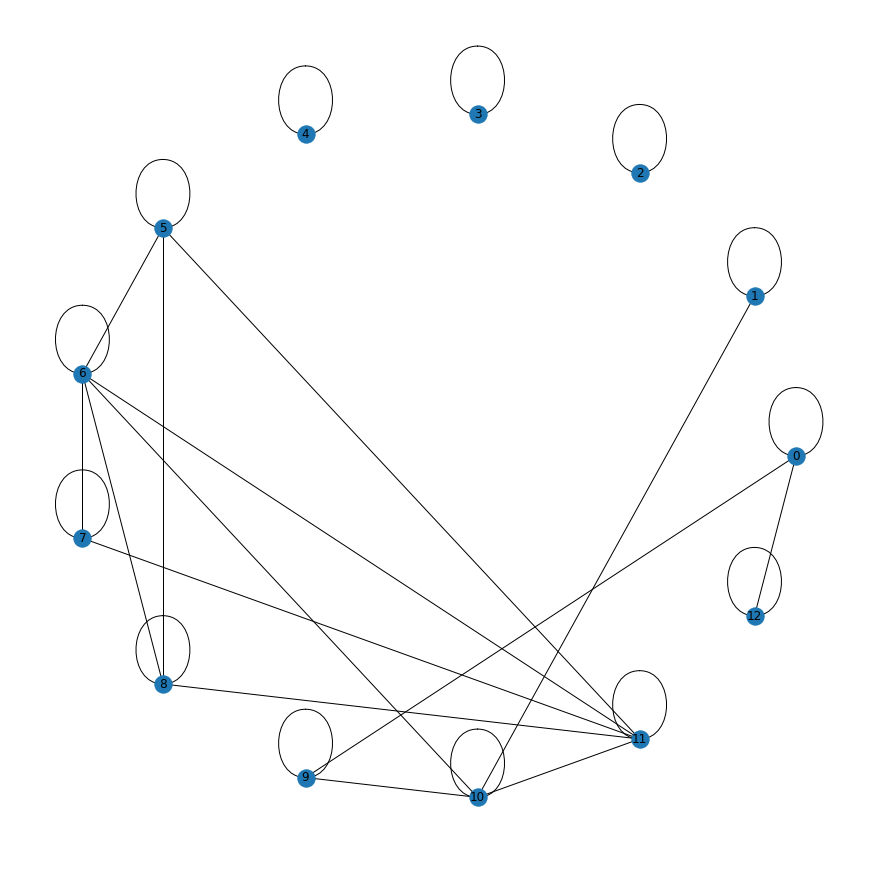

In [271]:
G = nx.from_pandas_adjacency(np.abs(corr)>0.5)

plt.figure(figsize=(12,12))
nx.draw_circular(G, with_labels=True)

## Math PhD Hiring Network


In [179]:
degrees = pd.read_csv('data/degrees.csv')
degrees

student  advisor
0             1      258
1             2      258
2             3      258
3             4      239
4             5      258
...         ...      ...
180941   166196     9364
180942   166197    84193
180943   166199    88609
180944   166199   166198
180945   166199   122958

[180946 rows x 2 columns]

In [181]:
schools = pd.read_csv('data/schools.csv')
schools

student    year  school
0             1  1933.0       1
1             2  1936.0       1
2             3  1939.0       1
3             4  1941.0       1
4             5  1942.0       1
...         ...     ...     ...
163438   166194  2011.0      68
163439   166195  1990.0     101
163440   166196  2012.0      59
163441   166197  2012.0      32
163442   166199  2012.0     591

[163443 rows x 3 columns]

In [208]:
data = schools[schools['year']>1980]
data

student    year  school
58           59  1993.0       2
158         159  1981.0       1
159         160  1981.0       1
160         161  1982.0       1
161         162  1982.0       1
...         ...     ...     ...
163438   166194  2011.0      68
163439   166195  1990.0     101
163440   166196  2012.0      59
163441   166197  2012.0      32
163442   166199  2012.0     591

[112005 rows x 3 columns]

In [209]:
tmp = data.merge(degrees,left_on='student',right_on='student')
tmp

student    year  school  advisor
0            59  1993.0       2    77441
1           159  1981.0       1      266
2           160  1981.0       1      267
3           161  1982.0       1      237
4           162  1982.0       1      242
...         ...     ...     ...      ...
128816   166196  2012.0      59     9364
128817   166197  2012.0      32    84193
128818   166199  2012.0     591    88609
128819   166199  2012.0     591   166198
128820   166199  2012.0     591   122958

[128821 rows x 4 columns]

In [210]:
tmp1 = tmp.merge(tmp,left_on='advisor',right_on='student')
tmp1 

student_x  year_x  school_x  advisor_x  student_y  year_y  school_y  \
0             59  1993.0         2      77441      77441  1989.0         8   
1          77442  2003.0         2      77441      77441  1989.0         8   
2          83251  1997.0         2      77441      77441  1989.0         8   
3            197  1990.0         1        241        241  1981.0         9   
4            236  1996.0         1        241        241  1981.0         9   
...          ...     ...       ...        ...        ...     ...       ...   
61018     166140  2012.0       272      56650      56650  1999.0       349   
61019     166164  2012.0       183     101047     101047  2006.0         8   
61020     166166  2012.0       194      91480      91480  1982.0       591   
61021     166199  2012.0       591     122958     122958  2008.0      1331   
61022     166199  2012.0       591     122958     122958  2008.0      1331   

       advisor_y  
0          40896  
1          40896  
2          40896  
3          12312  
4          12312  
...          ...  
61018      56576  
61019      70975  
61020      91449  
61021     122924  
61022      88606  

[61023 rows x 8 columns]

In [211]:
edges = Counter([(x,y) for y,x in zip(tmp1['school_y'],tmp1['school_x'])])
edges

Counter({(2, 8): 25,
         (1, 9): 6,
         (1, 7): 38,
         (1, 16): 2,
         (1, 24): 2,
         (19, 27): 2,
         (53, 38): 1,
         (23, 8): 28,
         (67, 149): 11,
         (313, 149): 2,
         (93, 17): 1,
         (110, 83): 14,
         (111, 28): 4,
         (111, 33): 1,
         (111, 23): 25,
         (49, 80): 13,
         (12, 9): 119,
         (112, 9): 22,
         (112, 439): 10,
         (95, 18): 14,
         (280, 18): 12,
         (60, 7): 8,
         (47, 418): 8,
         (115, 9): 16,
         (47, 47): 16,
         (2064, 47): 1,
         (35, 10): 11,
         (60, 118): 6,
         (73, 27): 7,
         (82, 112): 1,
         (73, 112): 5,
         (134, 21): 3,
         (11, 21): 1,
         (134, 9): 31,
         (135, 3): 10,
         (135, 48): 3,
         (111, 48): 3,
         (135, 7): 5,
         (135, 35): 3,
         (135, 59): 4,
         (114, 30): 18,
         (60, 30): 6,
         (213, 30): 4,
         (114, 59): 2,


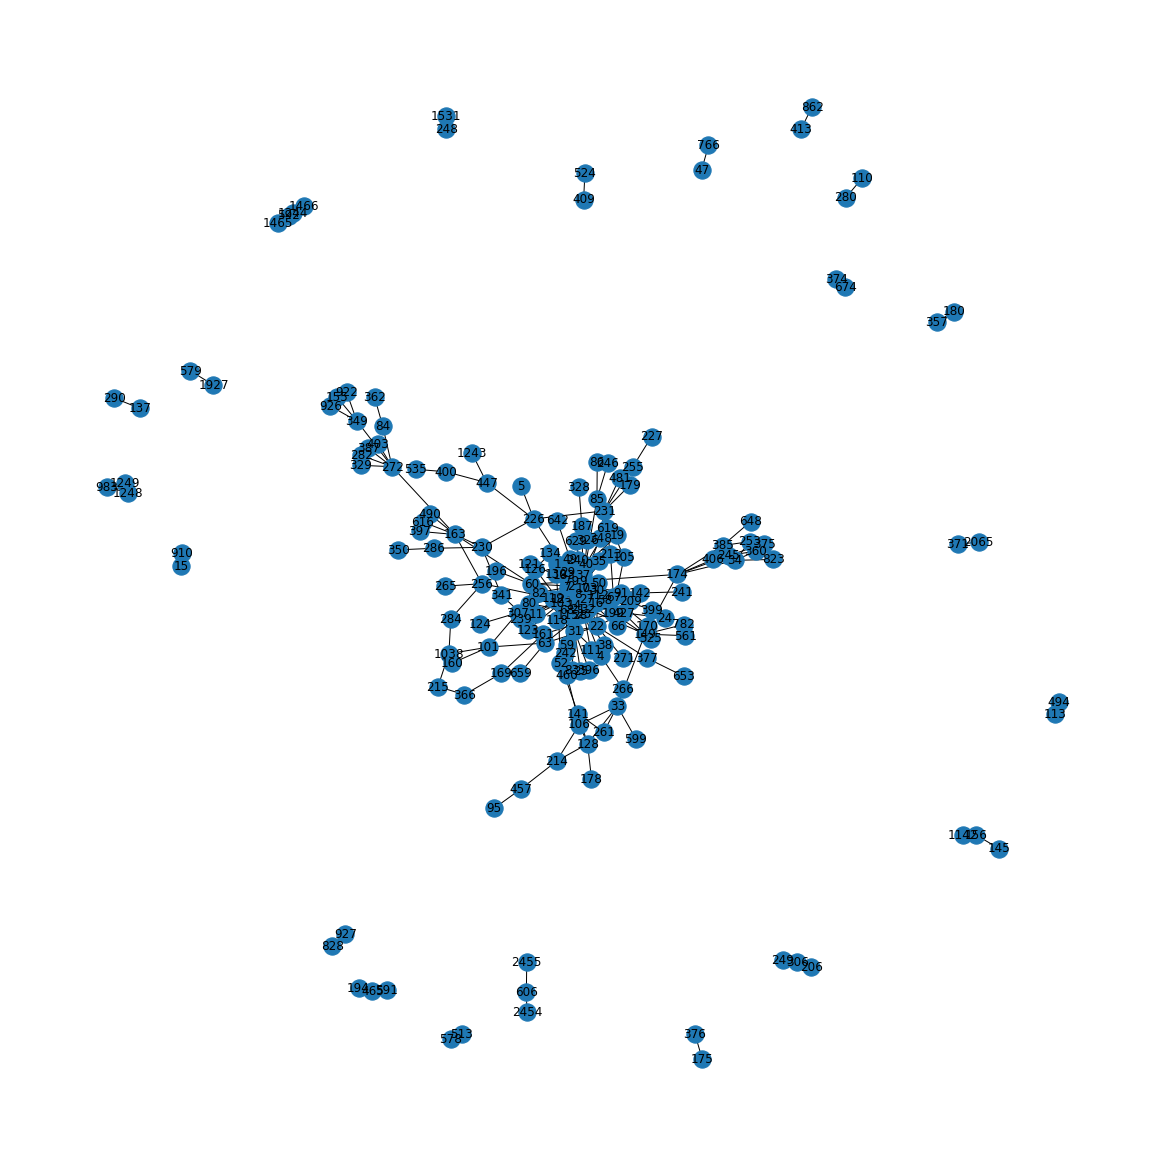

In [277]:
HiringGraph = nx.from_edgelist([x for x,y in edges.items() if y>20 and x[0]!=x[1]])
plt.figure(figsize=(16,16))
nx.draw_spring(HiringGraph,with_labels=True)

## Marvel Universe Characters 

In [272]:
characters = pd.read_csv('data/marvel_characters.csv')
characters

characterID                           name
0         1009220                Captain America
1         1010740                 Winter Soldier
2         1009471                      Nick Fury
3         1009552                   S.H.I.E.L.D.
4         1009228                  Sharon Carter
...           ...                            ...
1165      1011395  Talon (Fraternity of Raptors)
1166      1011196                  Captain Flint
1167      1009397                       Lava-Man
1168      1011113                     Blue Blade
1169      1011094                          Xavin

[1170 rows x 2 columns]

In [273]:
comics = pd.read_csv('data/marvel_characters_to_comics.csv')
comics

comicID  characterID
0        16232      1009220
1        16232      1010740
2        16248      1009220
3        16248      1009471
4        16248      1009552
...        ...          ...
75252    45951      1009337
75253    45951      1011428
75254    45951      1011086
75255    45951      1009546
75256    45951      1009724

[75257 rows x 2 columns]

In [274]:
gr = comics.groupby('characterID')
connections = {x[0]: set(x[1]['comicID']) for x in gr}
connections

{1009144: {1090,
  1130,
  1164,
  1170,
  1205,
  1214,
  2001,
  2319,
  2820,
  7340,
  7513,
  7514,
  9544,
  9545,
  9546,
  11068,
  11069,
  11070,
  11324,
  11326,
  11328,
  11341,
  11342,
  11346,
  12787,
  13893,
  14225,
  17468,
  17553,
  20367,
  31068,
  36737,
  36763,
  36972,
  43944,
  48816,
  48818,
  63217,
  63218,
  63219,
  64790,
  65357,
  65466,
  65941},
 1009146: {1098,
  1153,
  1187,
  2499,
  2577,
  3435,
  4241,
  5199,
  8557,
  8948,
  9125,
  9193,
  9194,
  9195,
  9243,
  9270,
  9283,
  9284,
  9285,
  11439,
  13911,
  14366,
  14384,
  14425,
  14428,
  14450,
  14451,
  15522,
  15894,
  15908,
  16877,
  17547,
  17548,
  19857,
  19938,
  19939,
  20863,
  23677,
  29541,
  31236,
  34050,
  59511,
  60446,
  60692},
 1009148: {1023,
  1072,
  2542,
  5234,
  5985,
  6277,
  7045,
  7046,
  7142,
  8499,
  9072,
  9689,
  9690,
  9696,
  9697,
  9698,
  9699,
  10492,
  10497,
  10588,
  10589,
  11534,
  11535,
  11703,
  11704,
  117

In [247]:
res = []
N = characters.shape[0]
M = 100

for i in range(N-1):
    for j in range(i,N):
        a = characters.iloc[i,0]
        b = characters.iloc[j,0]
        if len(connections[a].intersection(connections[b])) > M:
            x = characters.iloc[i,1]
            y = characters.iloc[j,1]
            if x != y:
                res.append((x,y))
res

[('Captain America', 'Winter Soldier'),
 ('Captain America', 'Nick Fury'),
 ('Captain America', 'Red Skull'),
 ('Captain America', 'Wolverine'),
 ('Captain America', 'Spider-Man'),
 ('Captain America', 'Iron Man'),
 ('Captain America', 'Hulk'),
 ('Captain America', 'Thor'),
 ('Captain America', 'Human Torch'),
 ('Captain America', 'Thing'),
 ('Captain America', 'Falcon'),
 ('Captain America', 'Avengers'),
 ('Captain America', 'Black Widow'),
 ('Captain America', 'Hawkeye'),
 ('Captain America', 'Quicksilver'),
 ('Captain America', 'Scarlet Witch'),
 ('Captain America', 'Wasp'),
 ('Captain America', 'Black Panther'),
 ('Captain America', 'Vision'),
 ('Captain America', 'She-Hulk (Jennifer Walters)'),
 ('Captain America', 'Mr. Fantastic'),
 ('Captain America', 'Sub-Mariner'),
 ('Nick Fury', 'Iron Man'),
 ('Beast', 'Colossus'),
 ('Beast', 'Cyclops'),
 ('Beast', 'Emma Frost'),
 ('Beast', 'Wolverine'),
 ('Beast', 'X-Men'),
 ('Beast', 'Iron Man'),
 ('Beast', 'Gambit'),
 ('Beast', 'Rogue'),
 

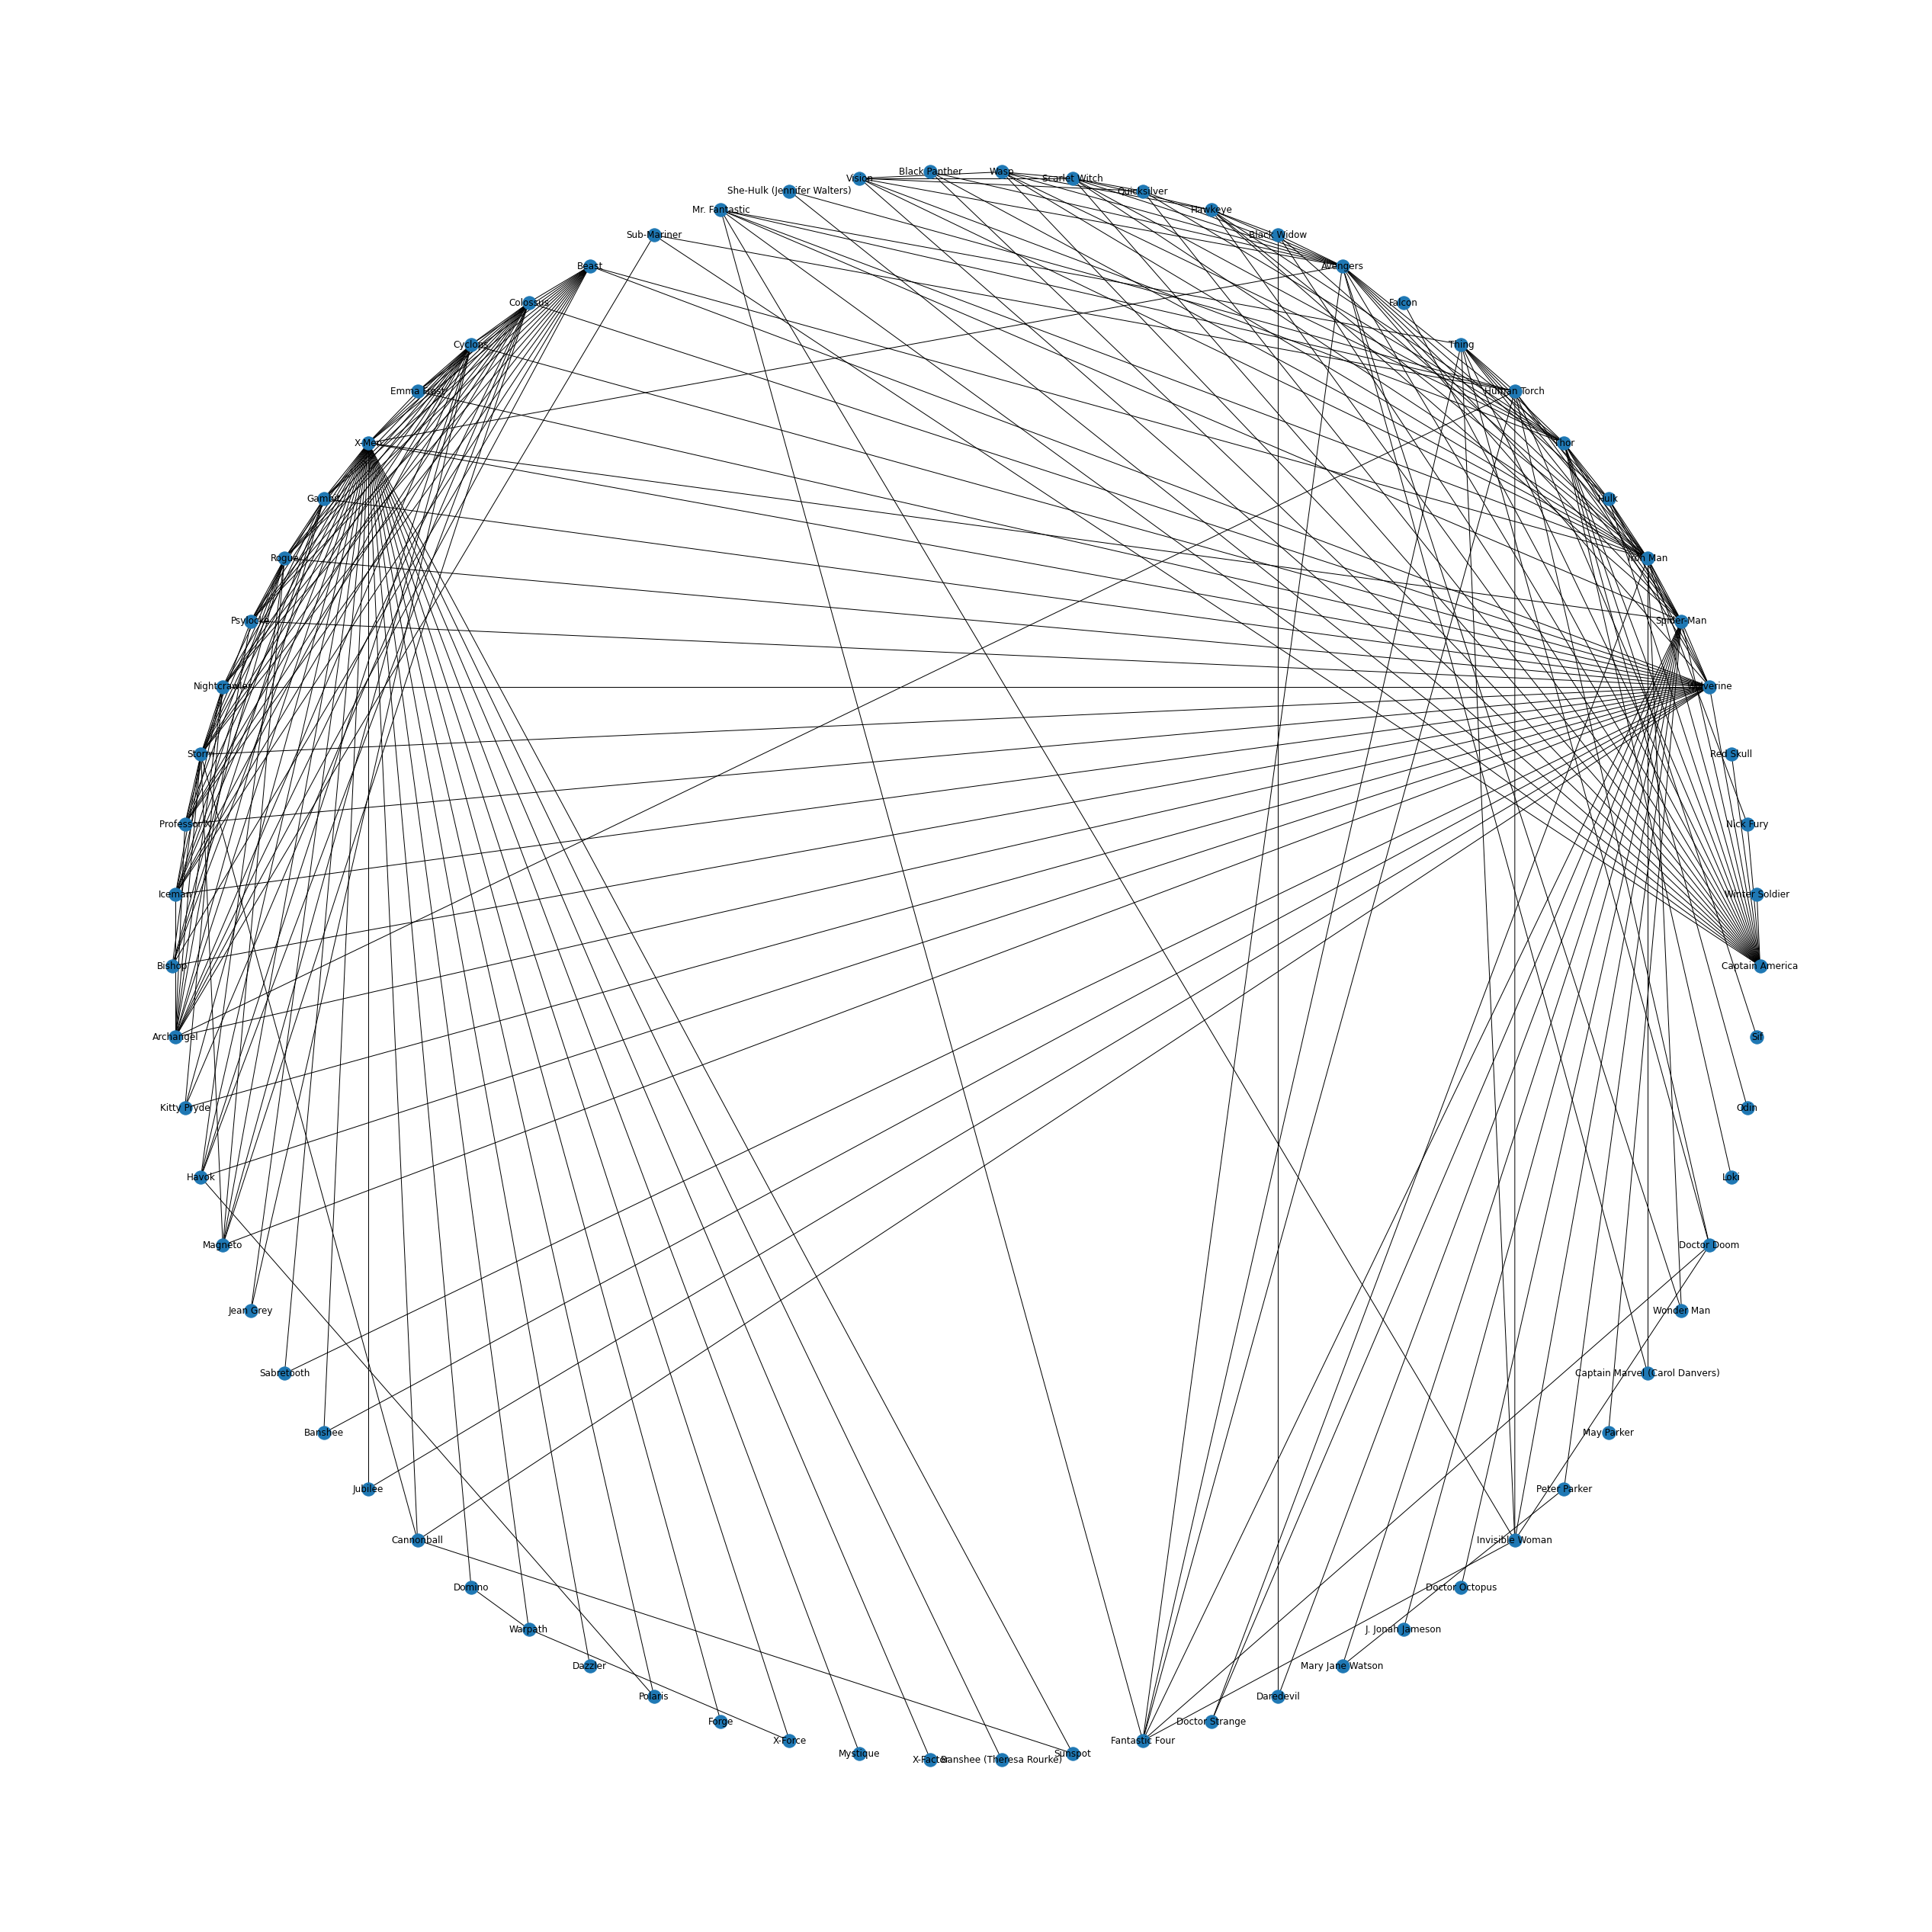

In [249]:
marvel = nx.from_edgelist(res)
plt.figure(figsize=(35,35))
nx.draw_circular(marvel,with_labels=True)